In [1]:
#* for data manipulation 
import pandas as pd 
import numpy as np 


from disk_analysis_tools import tiling_disk_plots as tdp
from disk_analysis_tools import tiling_disk_utils as tdu

#* for plotting: 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline
sns.set_theme(style="ticks")
sns.set_context("talk")
#

In [2]:
exp_db = tdu.query_exp_db()

In [3]:
exp_db.iloc[24].exp_description

'triplets v7: blue: v=3.8mm/s; brown:v=4mm/s; v=4.2mm/s; blue tip'

In [4]:
exp_id=25

In [5]:
meta_data = tdu.fetch_meas_metadata(exp_id=25)

In [6]:
meta_data

measurement_id  exp_id        date                    file_name material  \
0             127      25  14.04.2022     20220414_trip_v7_bfg.txt    steel   
1             128      25  14.04.2022  20220414_trip_v7_curing.txt    steel   

  process_step vac_mapping                       coordinates  meas_cap_status  \
0  before_glue   [1,1000]   coordinate-blue-brown-yellow.txt                1   
1       curing   [n,1000]   coordinate-blue-brown-yellow.txt                1   

                                            comments  
0  before gluing; no vacuum -> measurement looks ...  
1                                  curing v7 reps 24

In [7]:
meas_id_bg = 127
meas_id_sig = 128

In [8]:
v7_data_pt = tdu.laser_data_analysis(meas_id_sig, #* meas signal
                                           meas_id_bg, #* meas bg
                                           meta_data, 
                                           folder='triplets',
                                            bg_data_check=False, 
                                            sig_data_check=False,
                                            print_removed_points=True,
                                            )

20220414_trip_v7_bfg.txt
Reading data...
Reading done
20220414_trip_v7_curing.txt
Reading data...
Reading done
Background Data:
Total points removed: 812
Total points removed: 0.12%
Signal Data:
Total points removed: 627
Total points removed: 0.09%
Background Data:
Total points removed: 812
Total points removed: 0.12%
Signal Data:
Total points removed: 645
Total points removed: 0.09%
Background Data:
Total points removed: 812
Total points removed: 0.12%
Signal Data:
Total points removed: 624
Total points removed: 0.09%
Background Data:
Total points removed: 812
Total points removed: 0.12%
Signal Data:
Total points removed: 636
Total points removed: 0.09%
Background Data:
Total points removed: 812
Total points removed: 0.12%
Signal Data:
Total points removed: 640
Total points removed: 0.09%
Background Data:
Total points removed: 812
Total points removed: 0.12%
Signal Data:
Total points removed: 693
Total points removed: 0.10%
Background Data:
Total points removed: 812
Total points remov

In [9]:
result_df= tdu.calc_flats_statistic_df(v7_data_pt)

(curing, vac off)


c:\Users\Domin\Nextcloud\Master\Disk_Tiling_Measurements\MADMAX_disk_analysis\analysis_notebooks\disk_analysis_tools\tiling_disk_plots.py:113: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=figsize,  constrained_layout=False)


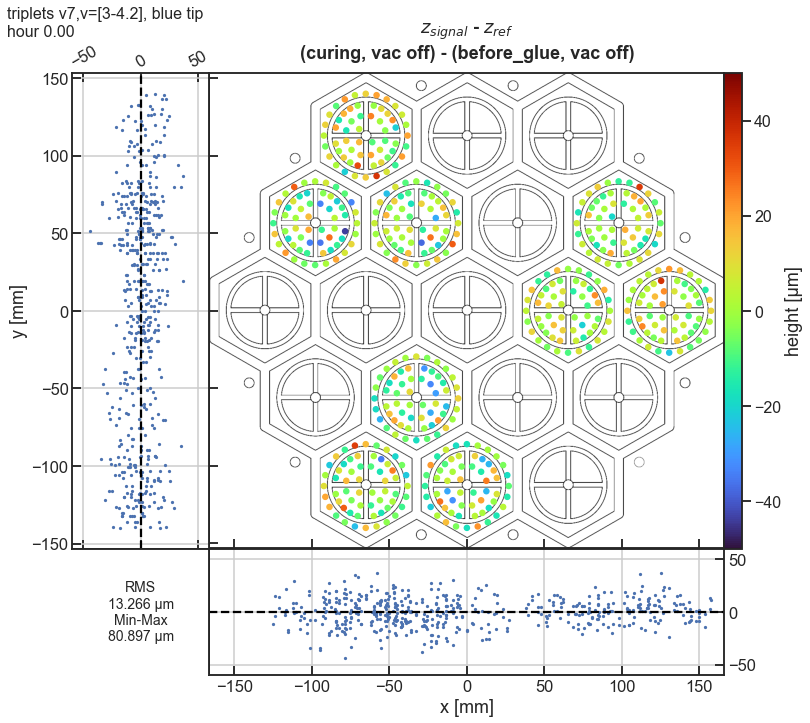

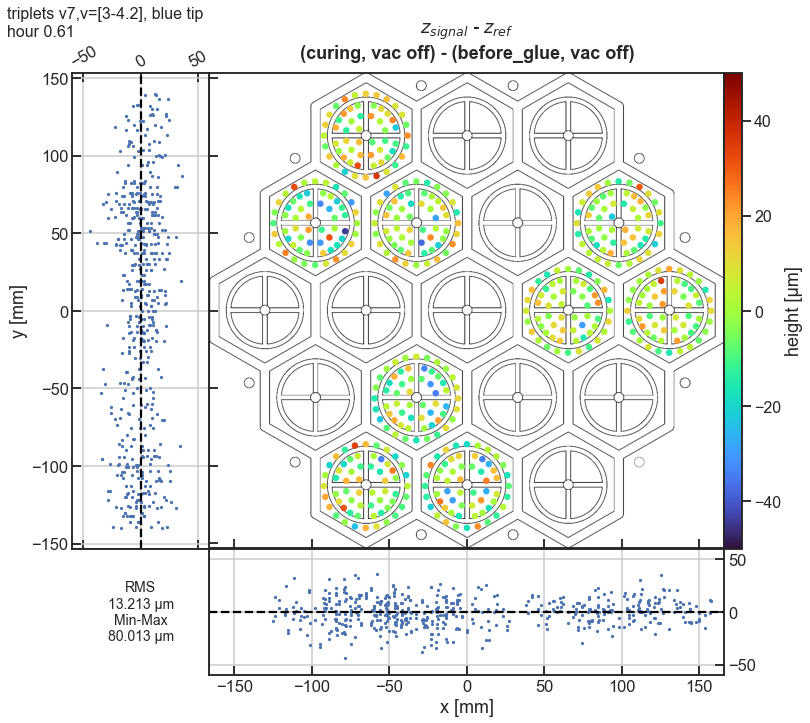

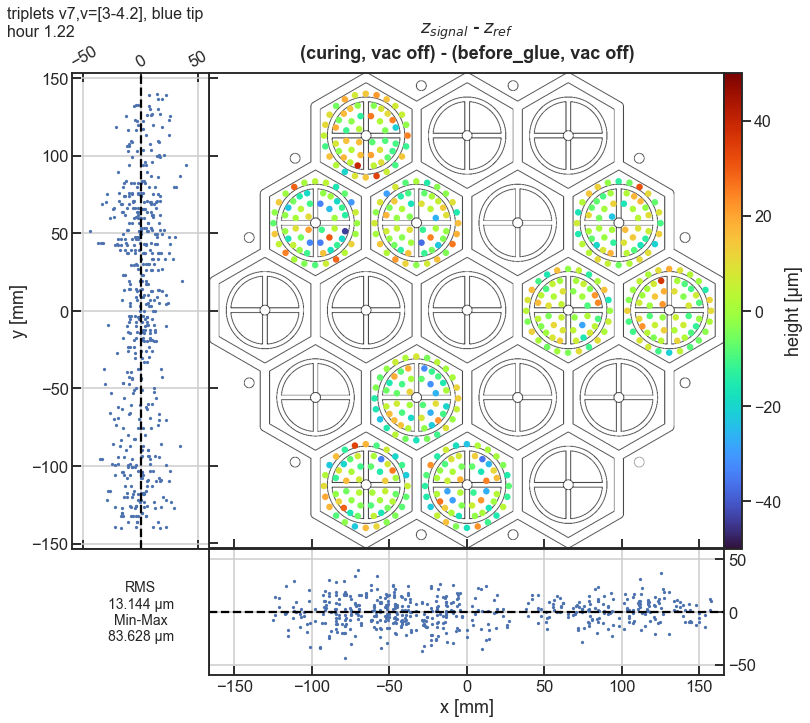

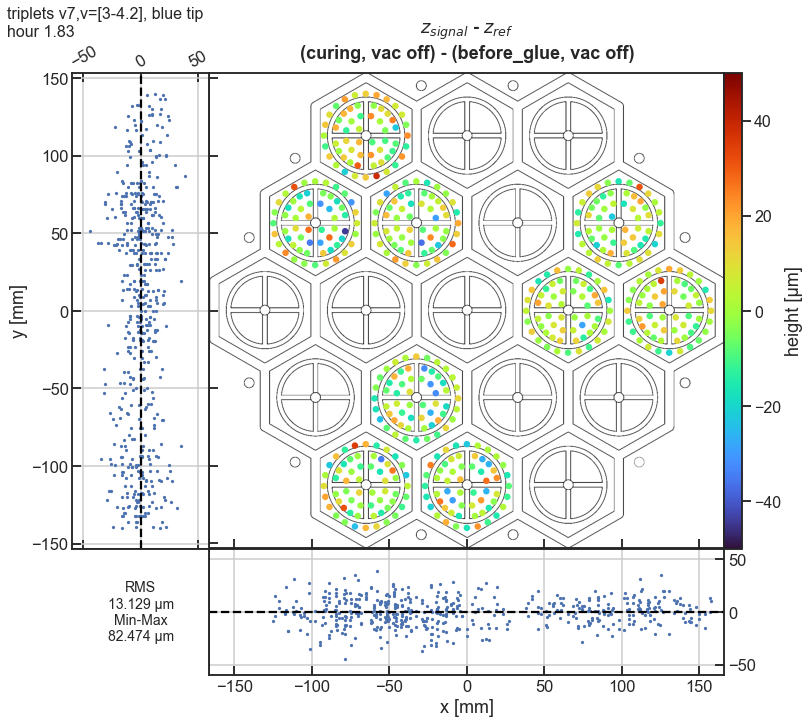

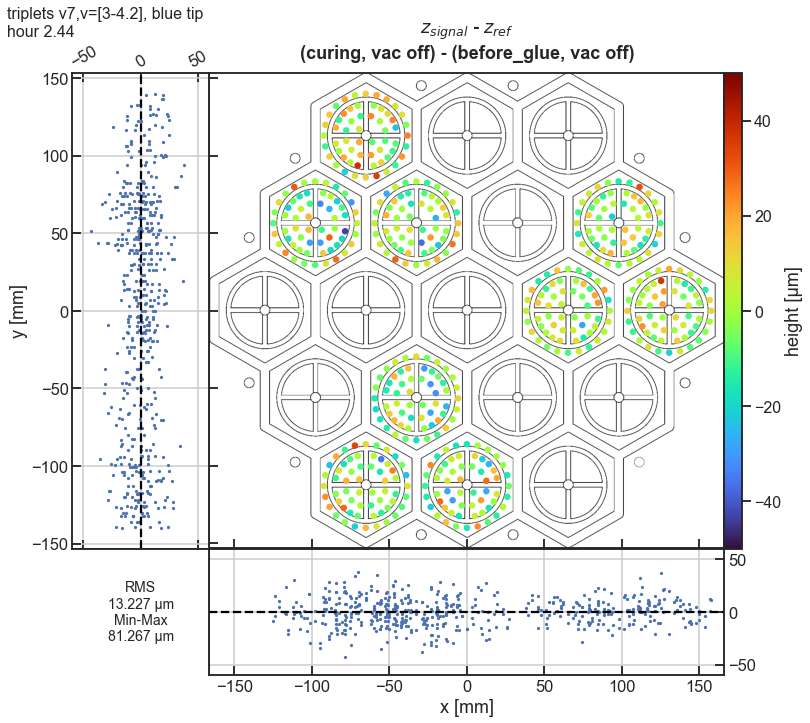

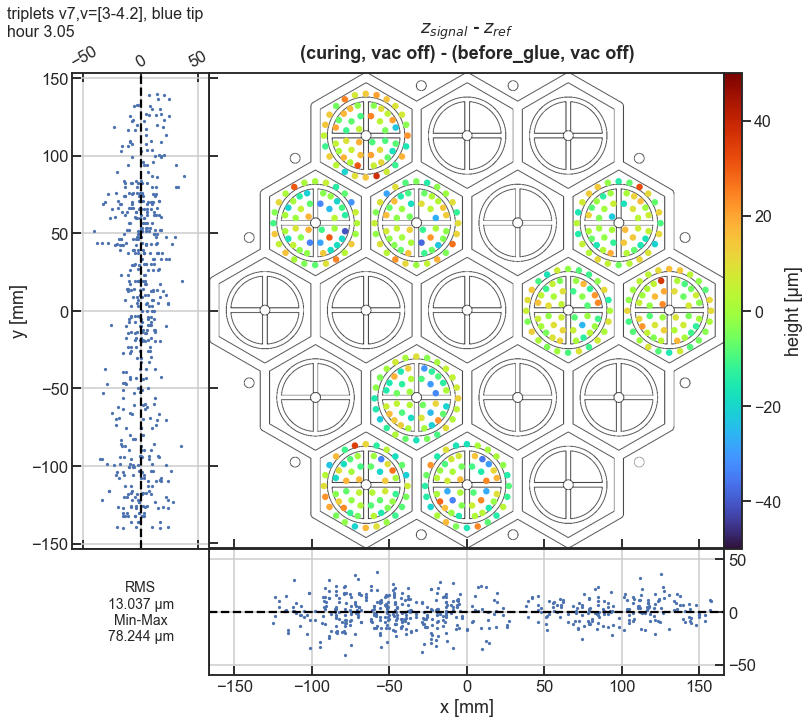

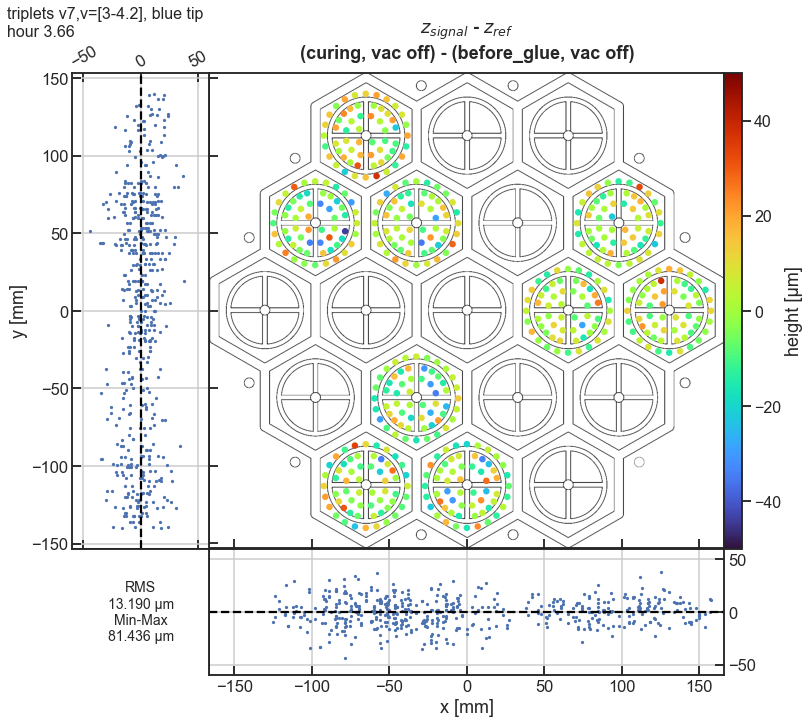

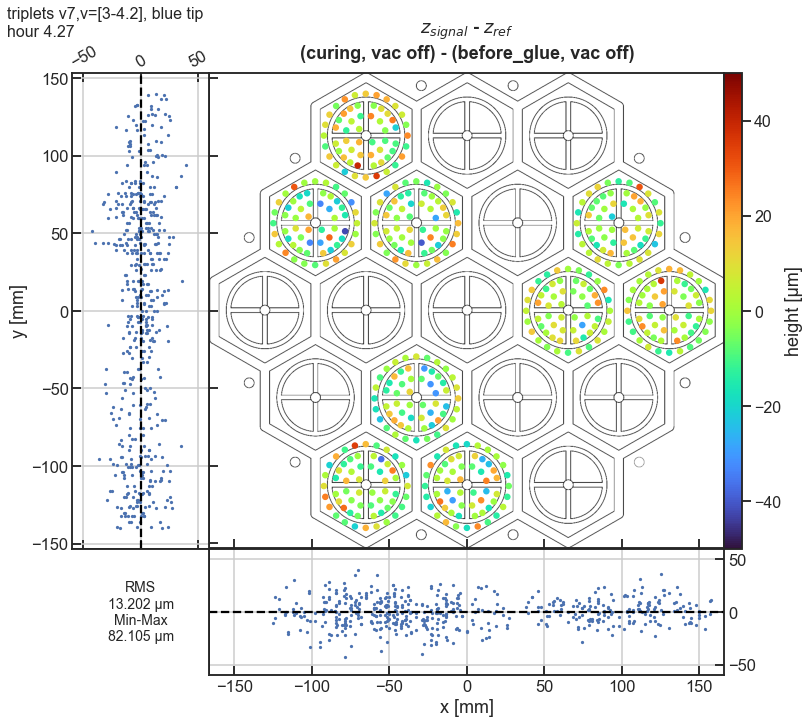

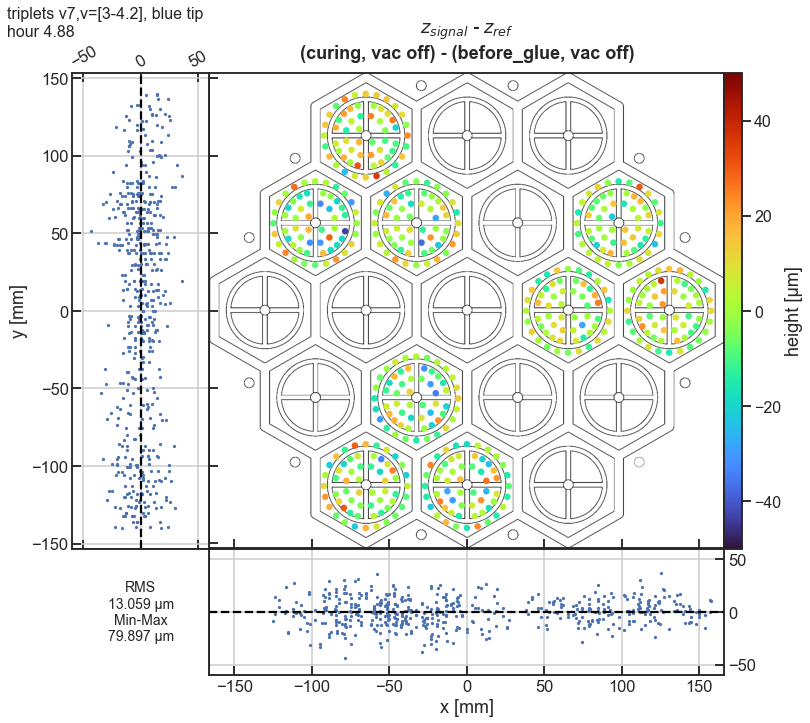

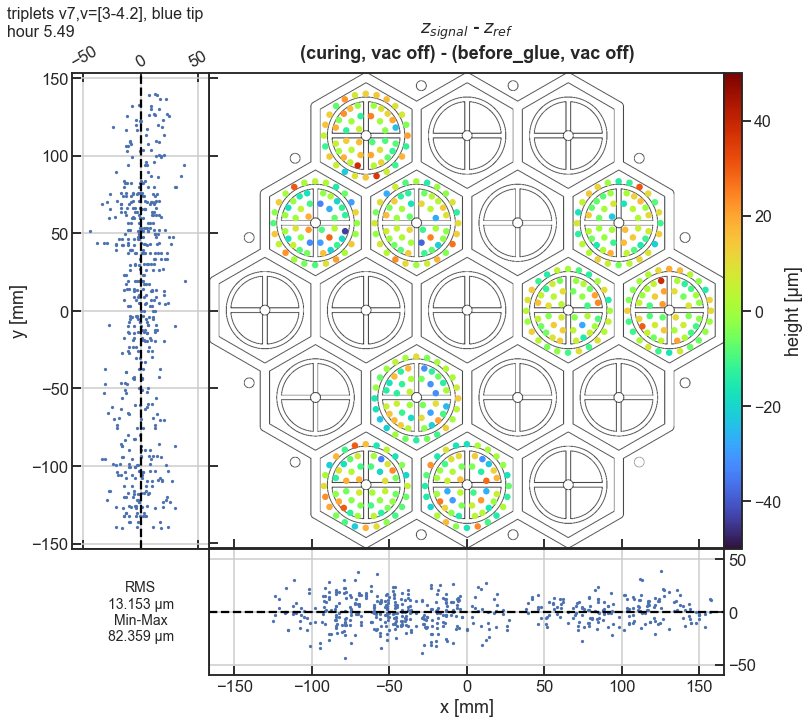

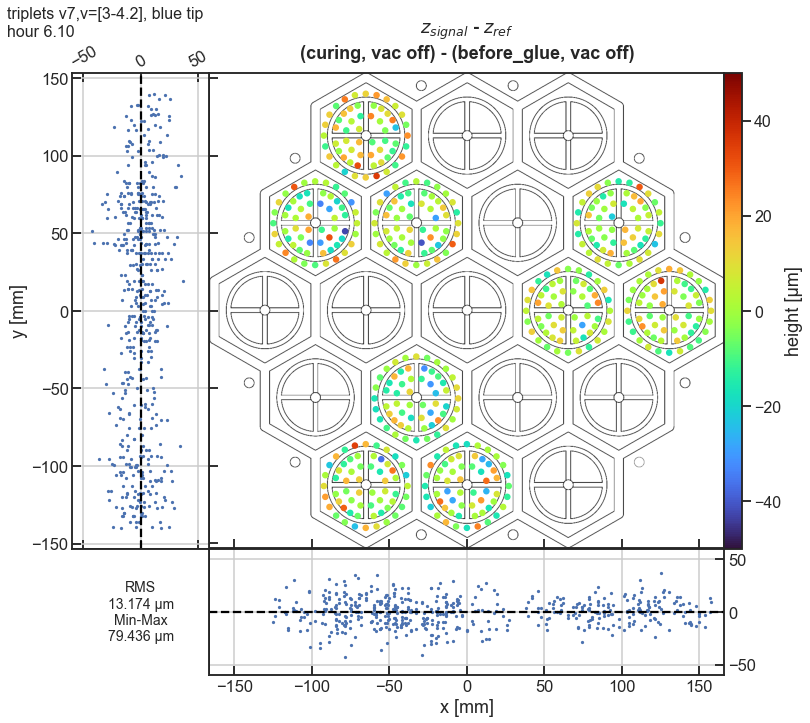

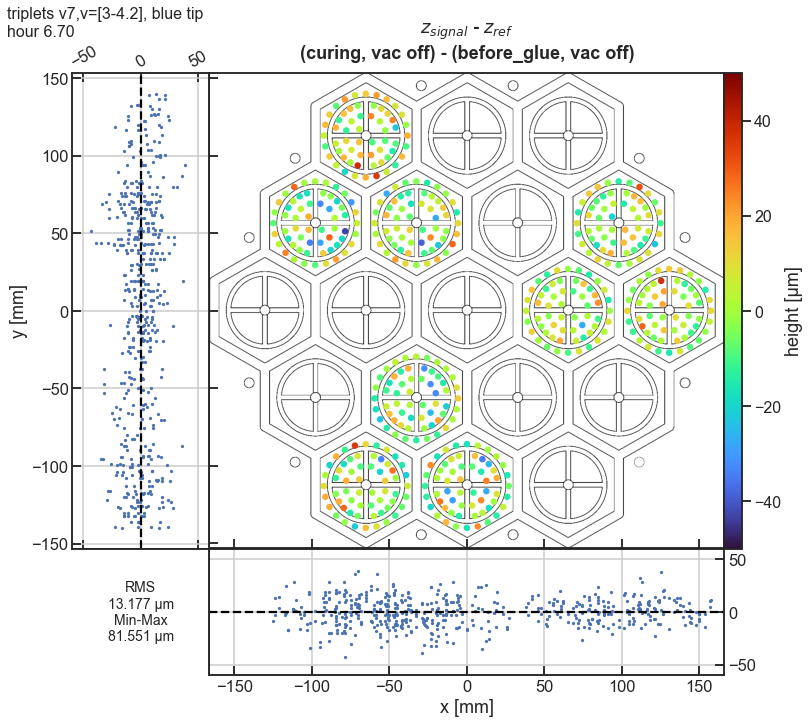

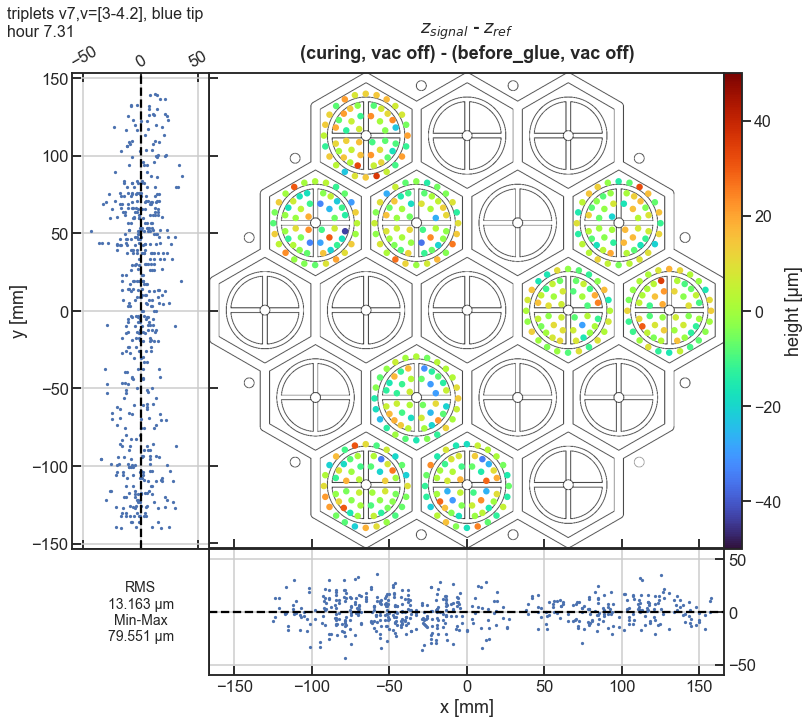

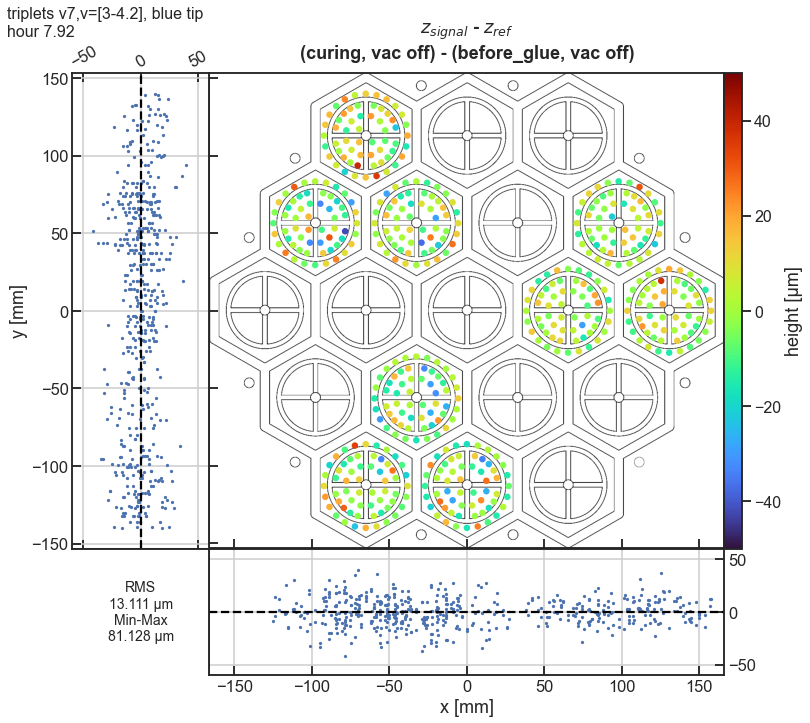

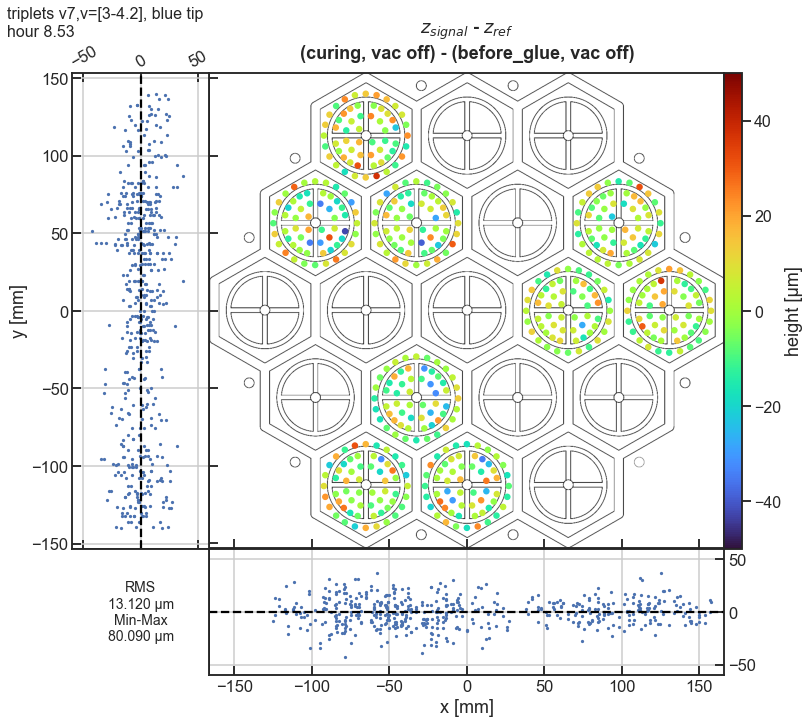

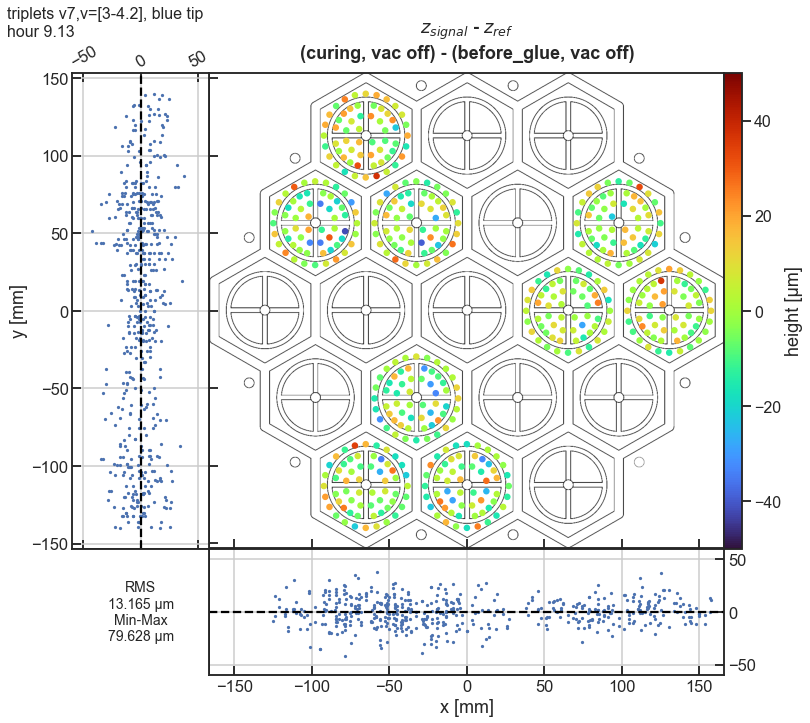

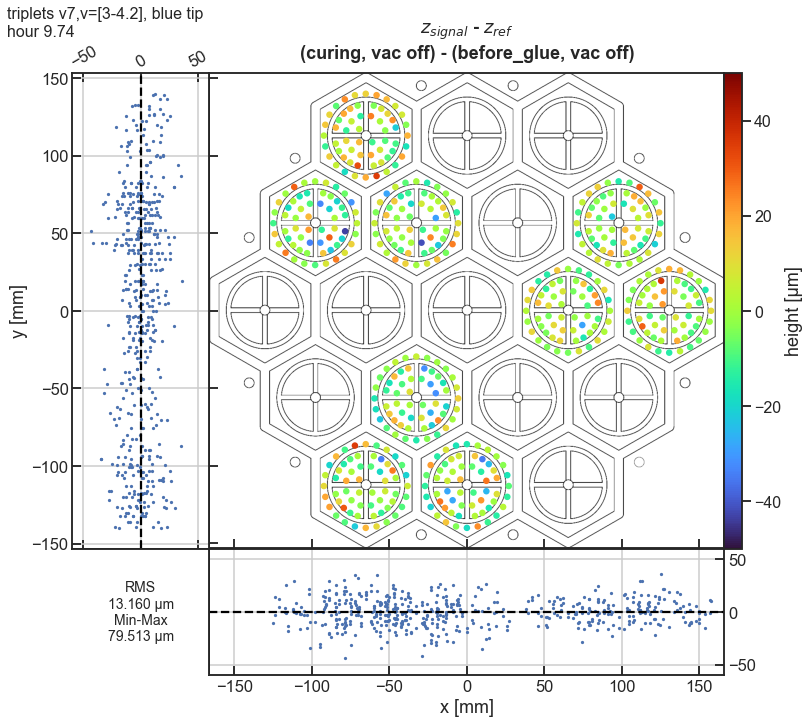

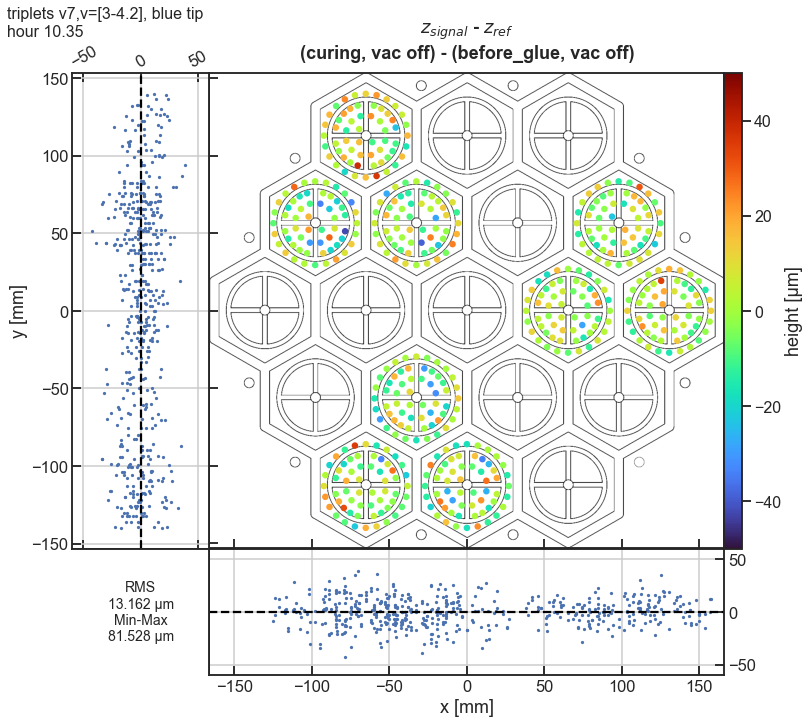

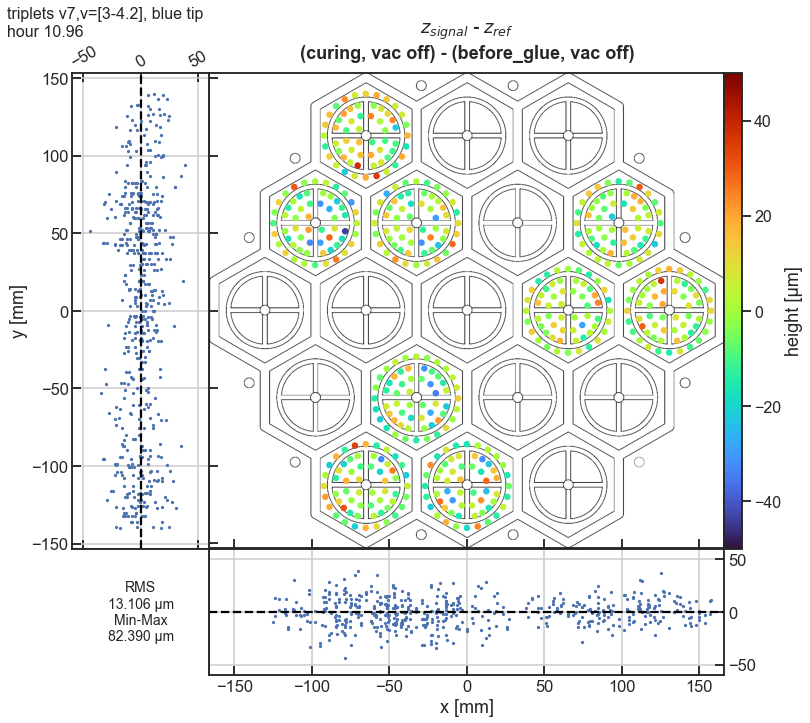

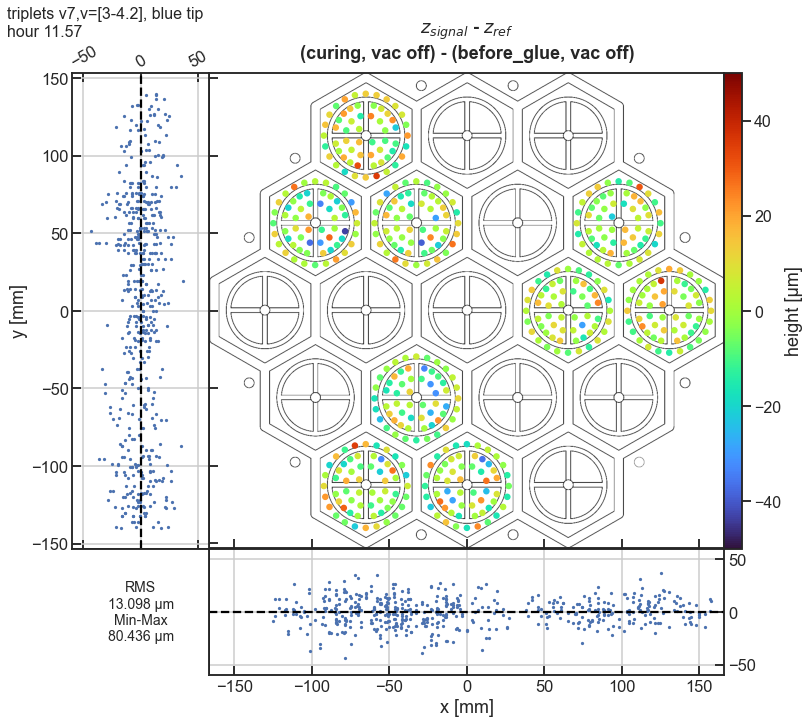

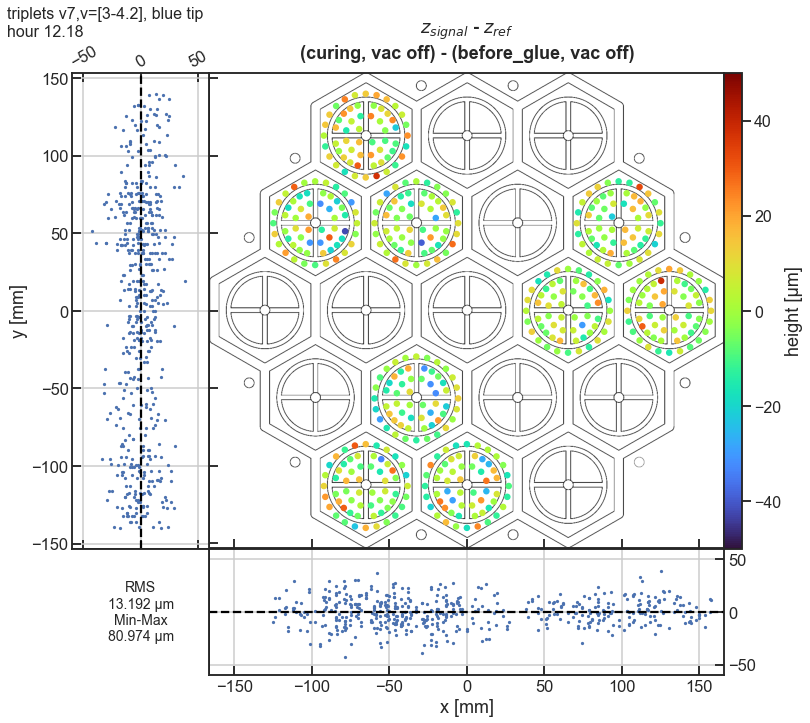

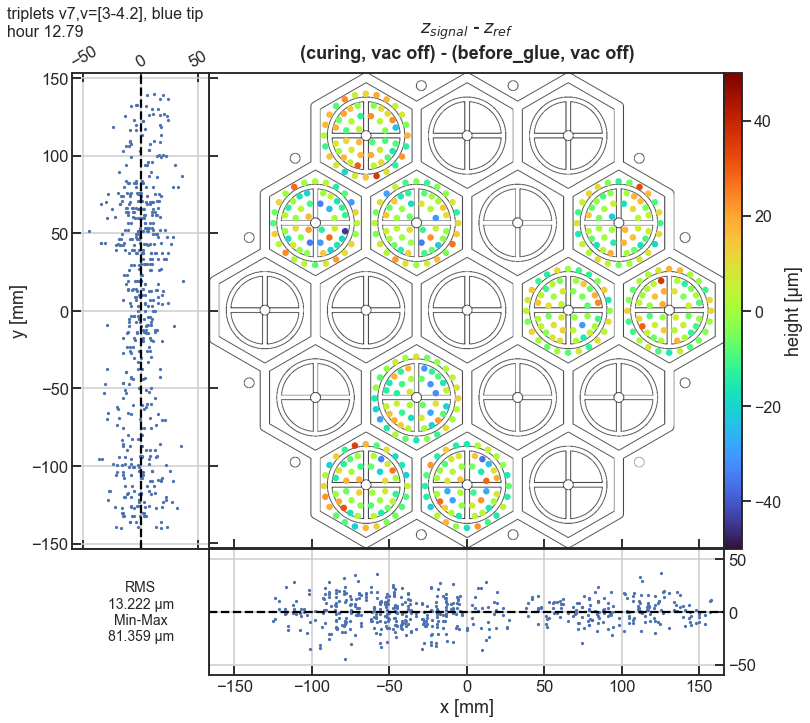

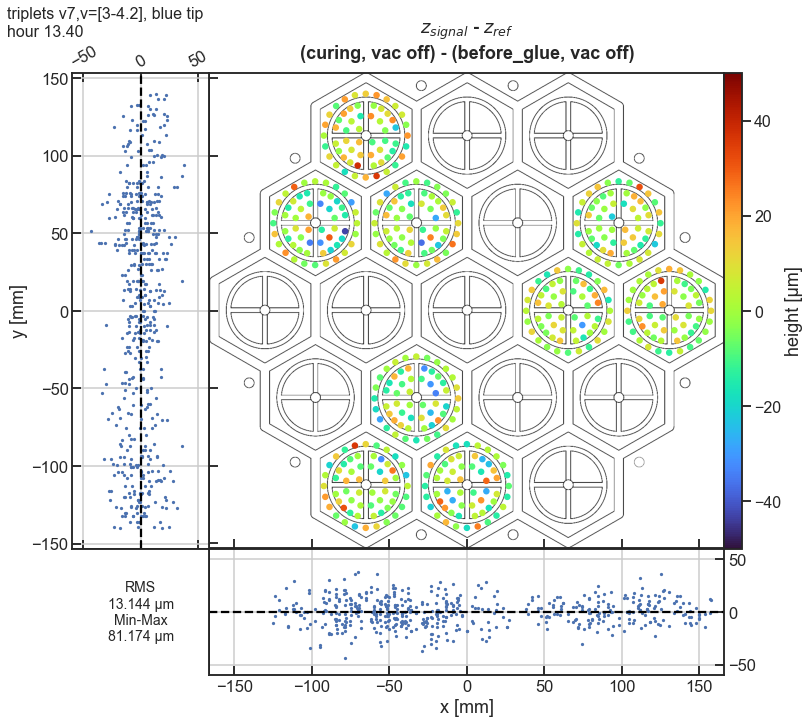

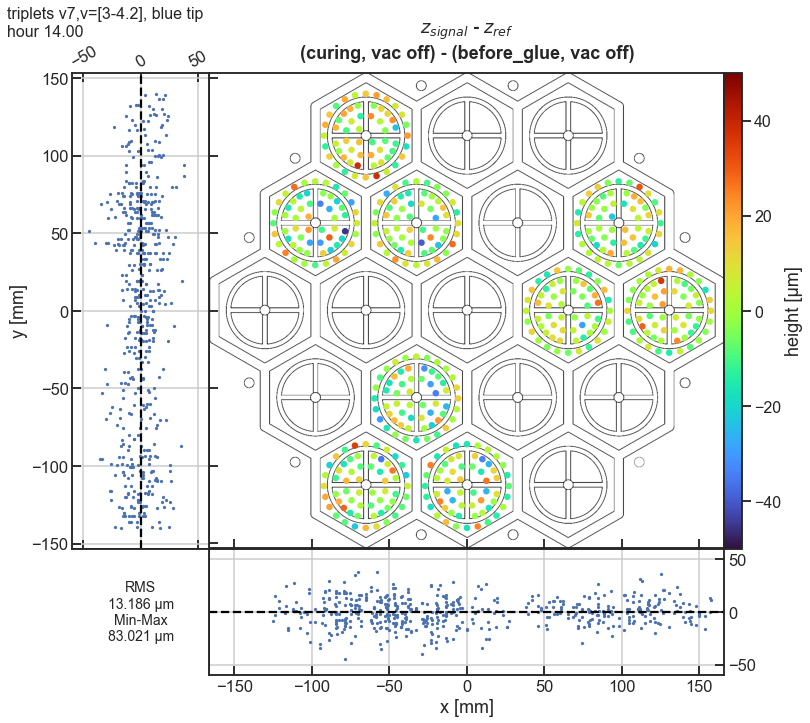

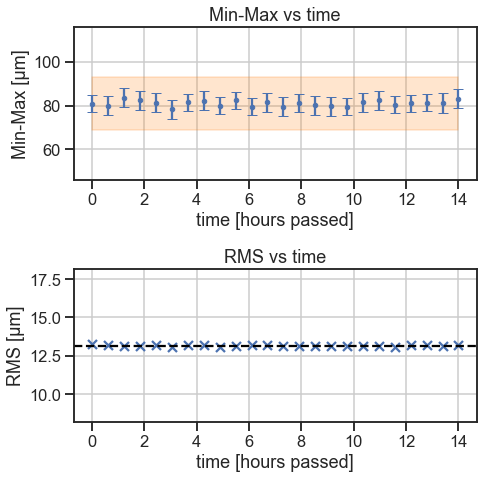

In [10]:
tdp.plot_analysis_results(exp_id, #*exp id
                          v7_data_pt, #* measurements dict
                          exp_db, #* experiments database
                          meta_data, #* meta data df
                          meas_id_sig= meas_id_sig,
                          meas_id_bg = meas_id_bg,
                        #   plot_runs=[1,24],
                          joyplot=False,hexagon_flatness=True, R_vs_t=True, triplet=False)

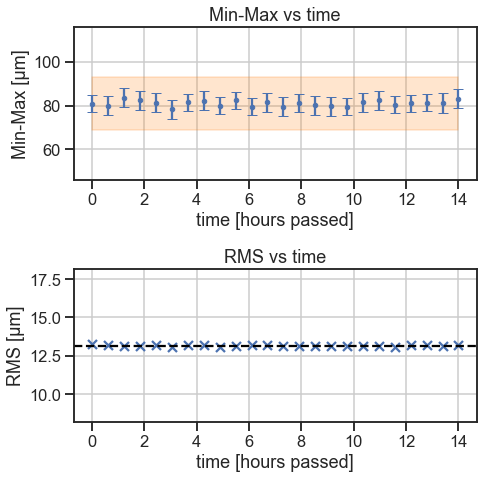

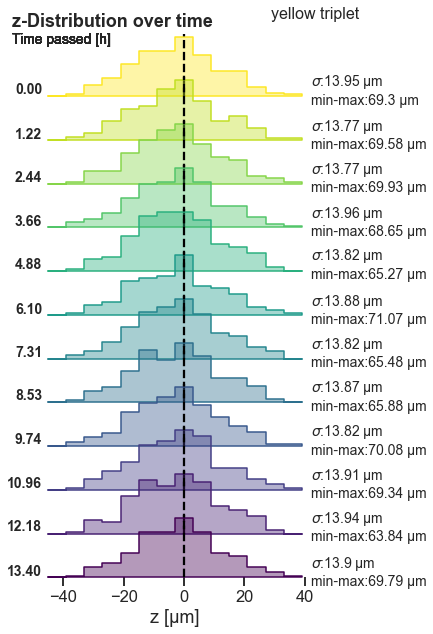

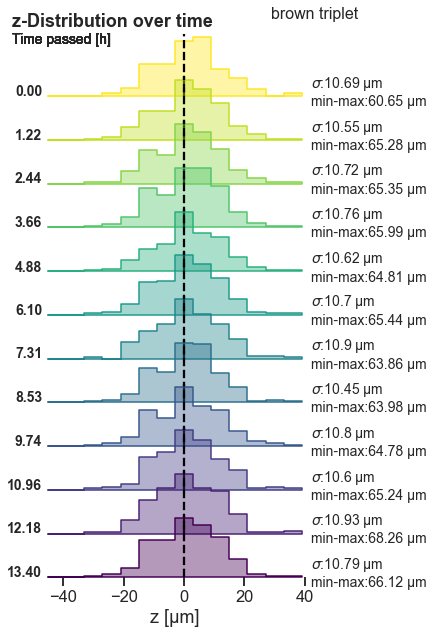

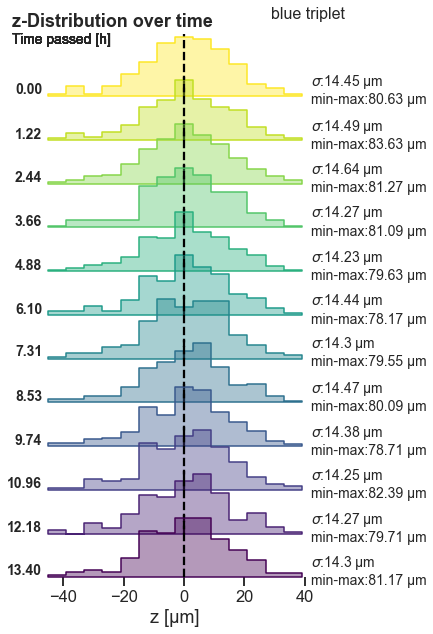

In [12]:
tdp.plot_analysis_results(exp_id, #*exp id
                          v7_data_pt, #* measurements dict
                          exp_db, #* experiments database
                          meta_data, #* meta data df
                          meas_id_sig= meas_id_sig,
                          meas_id_bg = meas_id_bg,
                          plot_runs=[1,24],
                          joyplot=True,hexagon_flatness=False, R_vs_t=True, triplet=True,
                          joyplot_summary_stats=True)